In [2]:
#import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
#import the dataset
df = pd.read_csv("/content/delivery_time (1).csv")

In [10]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<ipython-input-12-2d125c5c60cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Sorting Time"])


<Axes: xlabel='Sorting Time', ylabel='Density'>

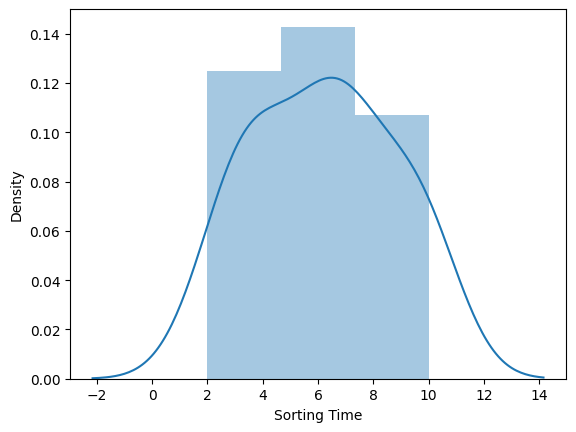

In [12]:
sns.distplot(df["Sorting Time"])

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

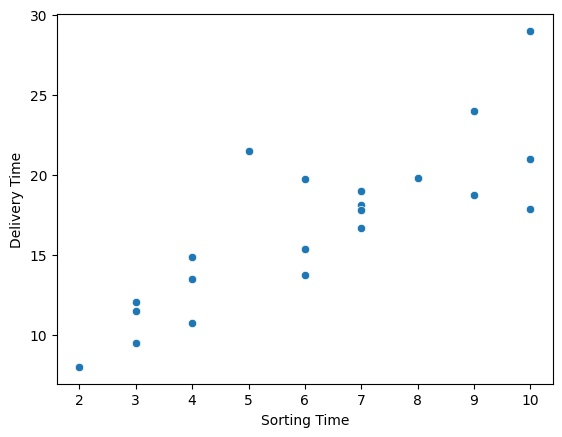

In [13]:
sns.scatterplot(x="Sorting Time",y="Delivery Time",data=df)

In [16]:
df1 = df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
df1


,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [56]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [55]:
print(model.tvalues,'|n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 |n Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [57]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [18]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time",data = df1).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           1.62e-27
Time:                        08:21:17   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
pred = model.predict(df1["Sorting_Time"])

In [ ]:
model.resid #errors

0     -16.848252
1      -9.241704
2     -24.353210
3     -31.589758
4     -12.382366
         ...    
104    -6.250337
105   -44.530093
106    -3.130398
107    50.770560
108    48.695244
Length: 109, dtype: float64

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

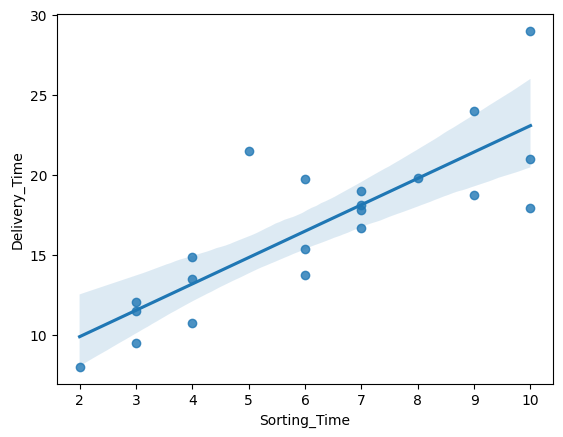

In [21]:
sns.regplot(x="Sorting_Time",y="Delivery_Time",data=df1)

In [23]:
rmse = np.sqrt(np.mean((np.array(df1["Delivery_Time"])-np.array(pred))**2))#to check rmse
rmse

2.7916503270617654

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

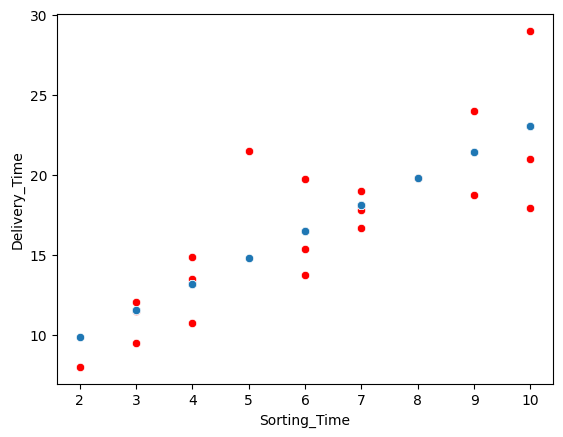

In [24]:
sns.scatterplot(x="Sorting_Time",y="Delivery_Time",data=df1,color="red")
sns.scatterplot(x="Sorting_Time",y=pred,data=df1)

In [25]:
model2 = smf.ols("Delivery_Time~np.log(Sorting_Time)",data = df1).fit()# log transformation

In [26]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           2.64e-06
Time:                        13:03:26   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
pred2 = model2.predict(df1["Sorting_Time"])

In [51]:
rmse2 = np.sqrt(np.mean((np.array(df1["Delivery_Time"])-np.array(pred2))**2))
rmse2

2.733171476682066

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

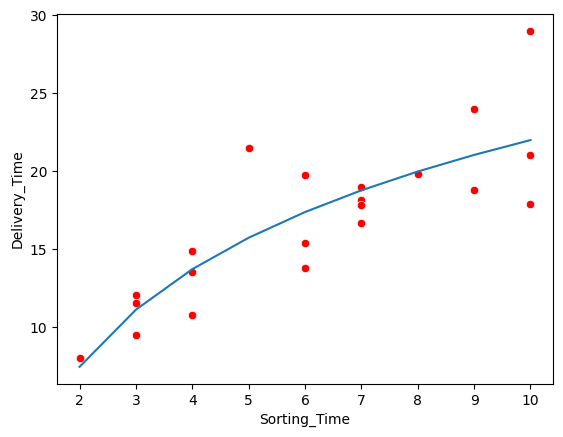

In [29]:
sns.scatterplot(x="Sorting_Time",y="Delivery_Time",data=df1,color="red")
sns.lineplot(x="Sorting_Time",y=pred2,data=df1)

In [31]:
model3 = smf.ols("np.log(Delivery_Time)~Sorting_Time",data = df1).fit()#exponential transformation
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Fri, 13 Oct 2023   Prob (F-statistic):           1.59e-06
Time:                           13:06:11   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
pred3= model3.predict(df1["Sorting_Time"])

In [33]:
pred3=np.exp(pred3)

In [34]:
rmse3 = np.sqrt(np.mean((np.array(df1["Delivery_Time"])-np.array(pred3))**2))
rmse3

2.9402503230562007

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

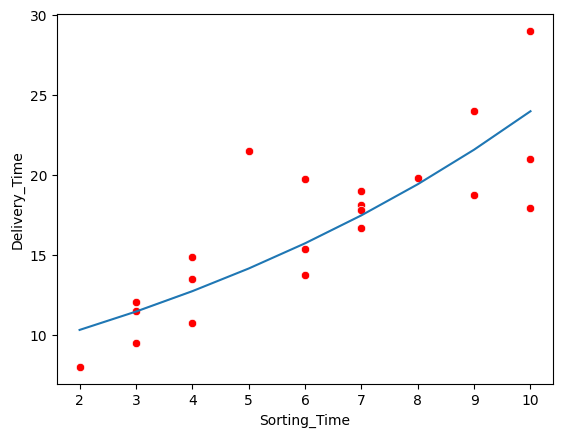

In [35]:
sns.scatterplot(x="Sorting_Time",y="Delivery_Time",data=df1,color="red")
sns.lineplot(x="Sorting_Time",y=pred3,data=df1)

In [40]:
df1["Sorting_Time_sq"]=df1["Sorting_Time"]*df1["Sorting_Time"]

df1.head()

,Delivery_Time,Sorting_Time,Sorting_Time_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100


In [41]:
model4 = smf.ols("np.log(Delivery_Time)~Sorting_Time+Sorting_Time_sq",data = df1).fit()#sqrd transformation
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Fri, 13 Oct 2023   Prob (F-statistic):           2.20e-06
Time:                           13:10:47   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_Time        0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_Time_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
pred4 = model4.predict(df1[["Sorting_Time","Sorting_Time_sq"]])

In [43]:
pred4=np.exp(pred4)

In [44]:
rmse4 = np.sqrt(np.mean((np.array(df1["Delivery_Time"])-np.array(pred4))**2))
rmse4

2.799041988740932

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

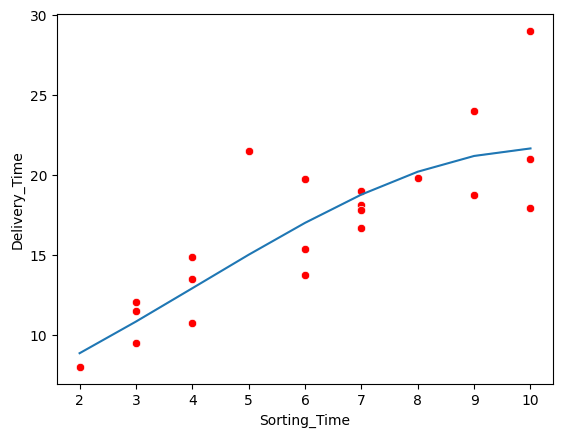

In [45]:
sns.scatterplot(x="Sorting_Time",y="Delivery_Time",data=df1,color="red")
sns.lineplot(x="Sorting_Time",y=pred4,data=df1)

In [52]:
print(rmse)
print(rmse2)
print(rmse3)
print(rmse4)

2.7916503270617654
2.733171476682066
2.9402503230562007
2.799041988740932
